<a href="https://colab.research.google.com/github/paigeyeung/exowatch-colab/blob/master/Single_Transit_Submission_Form.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before anything else, make a copy of this notebook in your drive. You will be using this copy to run everything.

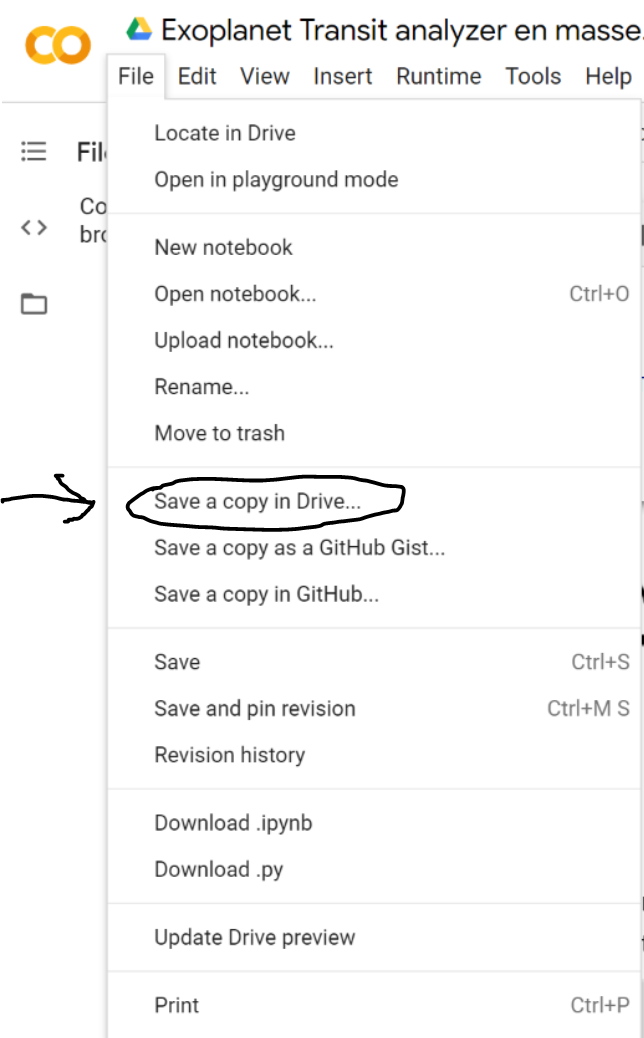

To start, run the two cells below to mount google drive. To run a cell, simply click the play button in the upper left corner.
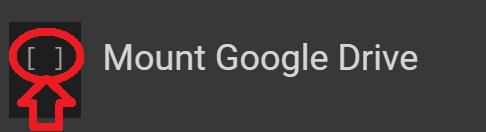

For each of the two cells, you will see a link to click. Click that link, click allow, copy the authorization code you get, and enter it into the box you get after running the cell.

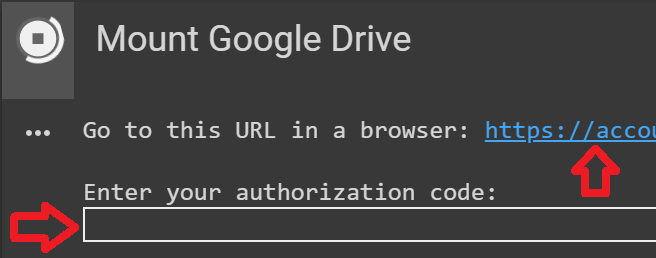




---



---


---



---




In [ ]:
#@title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#@title Authorize Access to Google Sheets
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())



---



---



---



---



The first cell below will import modules that are needed

In [ ]:
#@title Import Modules
!pip install pygsheets
import pygsheets
import google.auth
import pandas as pd
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import os
import subprocess
import shutil
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import os
from astropy.time import Time
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

     |████████████████████████████████| 112kB 2.8MB/s 


In the cell below, enter the values for each of the variables below based the transit you want to submit. Then run the cell to submit it/enter it into the spreadsheets. Do this once for each transit run you want to submit. *PLEASE* PUT A '/' AT THE END OF EACH PATH TO A FOLDER.* See below for a desciption of each parameter.  
* name  #the name of the person who ran the transit
* link_to_out <- link to the output folder
  *  make sure to change the sharing settings in google drive to 'anyone with the link can edit' 
*   out_dir <- path to the folder you previously entered as the output folder and contains your EXOTIC output files
  * if in google drive, begin with '/content/drive/My Drive/' before the folder name
folder name
* transit <- the date of the transit you want to submit in yyyy-mm-dd format
* your_own_spreadsheet_link <- the link to your group's spreadsheet to put data into
* transit_outcome <- the outcome of the final lightcurve from running the transit
* comp_star <- number corresponding to the comparison star used (same as in transit running colab, see table below for RA and Dec)
* notes <- put anything you think is important to note, such as EXOTIC warnings, anything funny with some images, what you tried to do to fix something, etc.
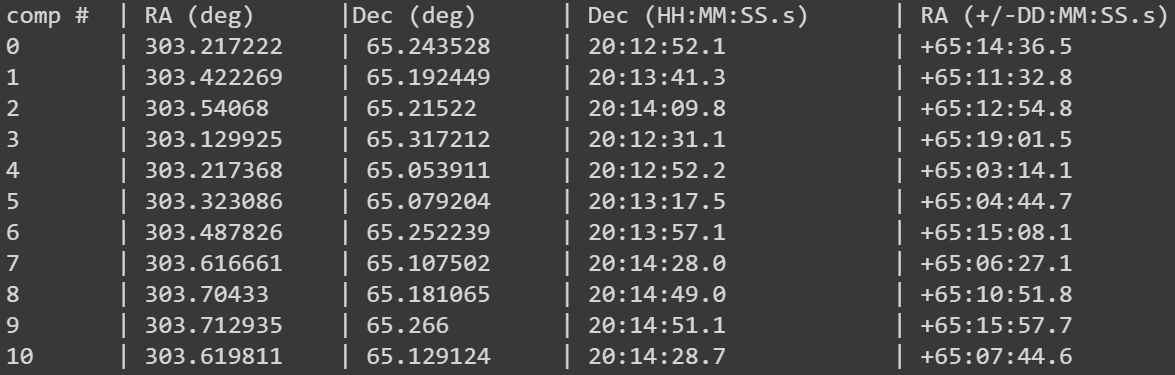

---



---

**$\LARGE\boxed{\text{Do not just run the cell below! You will have to change the parameters to match your transit.}}$**

---



---



In [ ]:
#@title Lightcurve Submission Form
name = "Quinn Perian" #@param {type:"string"}
link_to_out = "https://drive.google.com/open?id=1cAI54n436Nvvj9oo2Zto-ebf1UvnIhOQ" #@param {type:"string"}
out_dir = "/content/drive/My Drive/out/" #@param {type:"string"}
folder_to_transits = "/content/drive/My Drive/Qatar-1b-transits/" #@param {type:"string"}
folder_to_transits_unix = folder_to_transits.replace(' ', '\\\\ ')
transit = "2011-05-24" #@param {type:"string"}
your_own_spreadsheet_link = "https://docs.google.com/spreadsheets/d/1Dxzc-wokpxACASY-wdQwIe3bwgWNYTvwQJmjC5c3YWs/edit#gid=0" #@param {type:"string"}
transit_outcome = "Good Lightcurve" #@param ["Good Lightcurve", "Partial Lightcurve", "Poor Lightcurve", "Poor Weather", "Technical Issue"]
comp_star =  0#@param {type:"integer"}
notes = "" #@param {type:"string"}
spreadsheet_link = 'https://docs.google.com/spreadsheets/d/1Dxzc-wokpxACASY-wdQwIe3bwgWNYTvwQJmjC5c3YWs/edit#gid=0'
#@title Lightcurve Submission Form
i = 0
while i == 0:
  if not (os.path.isdir(os.path.join(out_dir,'Comp'+str(comp_star))) and os.path.isdir(os.path.join(folder_to_transits,transit))):
    raise ValueError('Your output directory or your transit folder does not exist. Please correct it and rerun this cell.')
  sh = gc.open_by_url(spreadsheet_link)
  sheet = sh.worksheet('Sheet1')
  sheet = sheet.get_all_values()
  wks = sh.sheet1
  folder_to_fits = folder_to_transits+transit+'/images/'
  folder_to_fits_unix = folder_to_transits_unix+transit+'/images/'
  images = os.listdir(folder_to_fits)
  print(images)
  ims_by_date = []
  for image in images:
    if image[-4:].lower() != 'fits':
      continue
    hdul = fits.open(folder_to_fits+image)
    ims_by_date.append((hdul[0].header['DATE-END'],image))
  ims_by_date = np.array(ims_by_date)
  if len(ims_by_date) == 0:
    mtt = 'n/a'
    mtt_u = 'n/a'
    RpRs = 'n/a'
    RpRs_u = 'n/a'
    depth_u = 'n/a'
    fit_am1 = 'n/a'
    fit_am1_u = 'n/a'
    fit_am2 = 'n/a'
    fit_am2_u = 'n/a'
    residual_scatter = 'n/a'
    df = pd.DataFrame()
    df['transit']=[transit]
    df['name']=[name]
    df['comp_star']=[str(comp_star)]
    df['link_to_out']=[link_to_out]
    df['mtt']=[str(mtt)]
    df['mtt_u']=[str(mtt_u)]
    df['residual_scatter']=[str(residual_scatter)]
    df['expected_transit_midpoint']=['n/a']
    df['epoch']=['n/a']
    df['O-C']=['=if(and(not(isblank(E'+str(len(sheet)+1)+')),not(isblank(H'+str(len(sheet)+1)+')), NOT(E'+str(len(sheet)+1)+' = "n/a")),(E'+str(len(sheet)+1)+'-H'+str(len(sheet)+1)+')*24*60,"n/a")']
    df['transit_outcome']=[transit_outcome]
    df['notes']=[notes]
    set_with_dataframe(wks, df,row=len(sheet)+1,allow_formulas=True,include_column_header=False)
    if your_own_spreadsheet_link != 'none':
      sh = gc.open_by_url(your_own_spreadsheet_link)
      sheet = sh.worksheet('Sheet1')
      sheet = sheet.get_all_values()
      wks = sh.sheet1
      set_with_dataframe(wks, df,row=len(sheet)+1,allow_formulas=True,include_column_header=False)
    break
  #print(np.argmin(np.array([[1,0],[2,3],[3,4],[4,5],[1,8])))
  print(np.argmax(ims_by_date,0))
  print(ims_by_date)
  end = ims_by_date[np.argmax(ims_by_date,1)[0]][0]
  t = Time.strptime(end, "%Y-%m-%dT%H:%M:%S.%f%z")
  transit_midpoint = 2456234.10321800  # observed transit midpoint  
  period = 1.42002420
  obs_end = (t.jd - transit_midpoint)/period
  print(obs_end)
  num_periods = round(obs_end)

  expected_transit_midpoint = transit_midpoint + (num_periods * period)
  if os.path.isfile(out_dir+'Comp'+str(comp_star)+'/'+'FinalParams'+'Qatar-1 b'+transit+".txt"):
    with open(out_dir+'Comp'+str(comp_star)+'/'+'FinalParams'+'Qatar-1 b'+transit+".txt", 'r') as infile:
      lines = infile.readlines()
      print(lines[1].split())
      mtt = lines[1].split()[5]
      mtt_u = lines[1].split()[7]
      RpRs = lines[2].split()[9]
      RpRs_u = lines[2].split()[11]
      depth_u = lines[3].split()[5]
      fit_am1 = lines[4].split()[4]
      fit_am1_u = lines[4].split()[6]
      fit_am2 = lines[5].split()[4]
      fit_am2_u = lines[5].split()[6]
      residual_scatter = lines[6].split()[10]
  else:
    mtt = 'n/a'
    mtt_u = 'n/a'
    RpRs = 'n/a'
    RpRs_u = 'n/a'
    depth_u = 'n/a'
    fit_am1 = 'n/a'
    fit_am1_u = 'n/a'
    fit_am2 = 'n/a'
    fit_am2_u = 'n/a'
    residual_scatter = 'n/a'
  df = pd.DataFrame()
  df['transit']=[transit]
  df['name']=[name]
  df['comp_star']=[str(comp_star)]
  df['link_to_out']=[link_to_out]
  df['mtt']=[str(mtt)]
  df['mtt_u']=[str(mtt_u)]
  df['residual_scatter']=[str(residual_scatter)]
  df['expected_transit_midpoint']=[str(expected_transit_midpoint)]
  df['epoch']=['=(H'+str(len(sheet)+1)+'-$H$2)/'+str(period)]
  df['O-C']=['=if(and(not(isblank(E'+str(len(sheet)+1)+')),not(isblank(H'+str(len(sheet)+1)+')), NOT(E'+str(len(sheet)+1)+' = "n/a")),(E'+str(len(sheet)+1)+'-H'+str(len(sheet)+1)+')*24*60,"n/a")']
  df['transit_outcome']=[transit_outcome]
  df['notes']=[notes]
  set_with_dataframe(wks, df,row=len(sheet)+1,allow_formulas=True,include_column_header=False)
  if your_own_spreadsheet_link != 'none':
    sh = gc.open_by_url(your_own_spreadsheet_link)
    sheet = sh.worksheet('Sheet1')
    sheet = sheet.get_all_values()
    wks = sh.sheet1
    if os.path.isfile(out_dir+'Comp'+str(comp_star)+'/'+'FinalParams'+'Qatar-1 b'+transit+".txt"):
      with open(out_dir+'Comp'+str(comp_star)+'/'+'FinalParams'+'Qatar-1 b'+transit+".txt", 'r') as infile:
        lines = infile.readlines()
        print(lines[1].split())
        mtt = lines[1].split()[5]
        mtt_u = lines[1].split()[7]
        RpRs = lines[2].split()[9]
        RpRs_u = lines[2].split()[11]
        depth_u = lines[3].split()[5]
        fit_am1 = lines[4].split()[4]
        fit_am1_u = lines[4].split()[6]
        fit_am2 = lines[5].split()[4]
        fit_am2_u = lines[5].split()[6]
        residual_scatter = lines[6].split()[10]
    else:
      mtt = 'n/a'
      mtt_u = 'n/a'
      RpRs = 'n/a'
      RpRs_u = 'n/a'
      depth_u = 'n/a'
      fit_am1 = 'n/a'
      fit_am1_u = 'n/a'
      fit_am2 = 'n/a'
      fit_am2_u = 'n/a'
      residual_scatter = 'n/a'
    df = pd.DataFrame()
    df['transit']=[transit]
    df['name']=[name]
    df['comp_star']=[str(comp_star)]
    df['link_to_out']=[link_to_out]
    df['mtt']=[str(mtt)]
    df['mtt_u']=[str(mtt_u)]
    df['residual_scatter']=[str(residual_scatter)]
    df['expected_transit_midpoint']=[str(expected_transit_midpoint)]
    df['epoch']=['=(H'+str(len(sheet)+1)+'-$H$2)/'+str(period)]
    df['O-C']=['=if(and(not(isblank(E'+str(len(sheet)+1)+')),not(isblank(H'+str(len(sheet)+1)+')), NOT(E'+str(len(sheet)+1)+' = "n/a")),(E'+str(len(sheet)+1)+'-H'+str(len(sheet)+1)+')*24*60,"n/a")']
    df['transit_outcome']=[transit_outcome]
    df['notes']=[notes]
    set_with_dataframe(wks, df,row=len(sheet)+1,allow_formulas=True,include_column_header=False)
  i=1

['Qatar-1110524064312.FITS', 'Qatar-1110524064513.FITS', 'Qatar-1110524064813.FITS', 'Qatar-1110524065112.FITS', 'Qatar-1110524065413.FITS', 'Qatar-1110524065713.FITS', 'Qatar-1110524070013.FITS', 'Qatar-1110524070313.FITS', 'Qatar-1110524070613.FITS', 'Qatar-1110524070913.FITS', 'Qatar-1110524071213.FITS', 'Qatar-1110524071513.FITS', 'Qatar-1110524071813.FITS', 'Qatar-1110524072113.FITS', 'Qatar-1110524072413.FITS', 'Qatar-1110524072712.FITS', 'Qatar-1110524073013.FITS', 'Qatar-1110524073313.FITS', 'Qatar-1110524073613.FITS', 'Qatar-1110524073913.FITS', 'Qatar-1110524074213.FITS', 'Qatar-1110524074513.FITS', 'Qatar-1110524074813.FITS', 'Qatar-1110524075113.FITS', 'Qatar-1110524075413.FITS', 'Qatar-1110524075713.FITS', 'Qatar-1110524080012.FITS', 'Qatar-1110524080313.FITS', 'Qatar-1110524080613.FITS', 'Qatar-1110524080913.FITS', 'Qatar-1110524081213.FITS', 'Qatar-1110524081513.FITS', 'Qatar-1110524081813.FITS', 'Qatar-1110524082113.FITS', 'Qatar-1110524082413.FITS', 'Qatar-111052408271

[72 72]
[['2011-05-23T23:44:14.521-0700' 'Qatar-1110524064312.FITS']
 ['2011-05-23T23:46:15.848-0700' 'Qatar-1110524064513.FITS']
 ['2011-05-23T23:49:15.042-0700' 'Qatar-1110524064813.FITS']
 ['2011-05-23T23:52:14.269-0700' 'Qatar-1110524065112.FITS']
 ['2011-05-23T23:55:15.954-0700' 'Qatar-1110524065413.FITS']
 ['2011-05-23T23:58:15.030-0700' 'Qatar-1110524065713.FITS']
 ['2011-05-24T00:01:15.378-0700' 'Qatar-1110524070013.FITS']
 ['2011-05-24T00:04:15.141-0700' 'Qatar-1110524070313.FITS']
 ['2011-05-24T00:07:15.898-0700' 'Qatar-1110524070613.FITS']
 ['2011-05-24T00:10:15.324-0700' 'Qatar-1110524070913.FITS']
 ['2011-05-24T00:13:15.790-0700' 'Qatar-1110524071213.FITS']
 ['2011-05-24T00:16:15.370-0700' 'Qatar-1110524071513.FITS']
 ['2011-05-24T00:19:15.640-0700' 'Qatar-1110524071813.FITS']
 ['2011-05-24T00:22:14.990-0700' 'Qatar-1110524072113.FITS']
 ['2011-05-24T00:25:15.439-0700' 'Qatar-1110524072413.FITS']
 ['2011-05-24T00:28:14.875-0700' 'Qatar-1110524072712.FITS']
 ['2011-05-24T00